In [1]:
# 基本套件和模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')
# 資料模組
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
print('\n'.join(boston['DESCR'].split('\n')[:26]))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['target'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


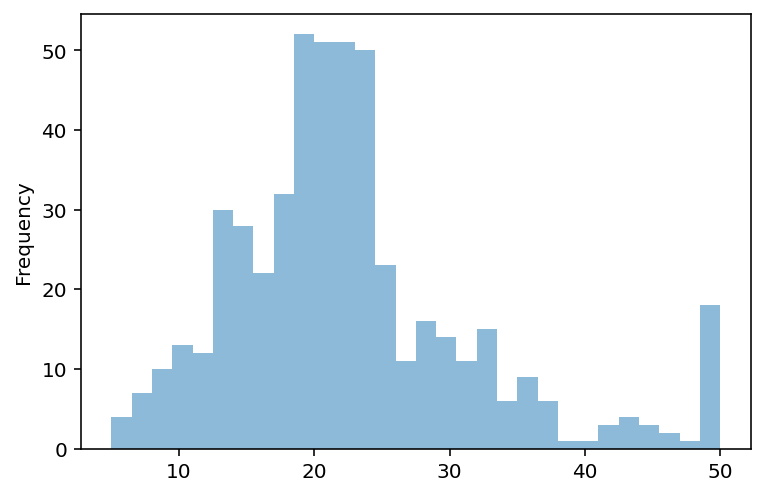

In [8]:
df['target'].plot(kind='hist', bins=30, alpha=0.5)

In [9]:
corr = df.corr().round(2)
corr['target'].sort_values(ascending=False)

target     1.00
RM         0.70
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
AGE       -0.38
RAD       -0.38
CRIM      -0.39
NOX       -0.43
TAX       -0.47
INDUS     -0.48
PTRATIO   -0.51
LSTAT     -0.74
Name: target, dtype: float64

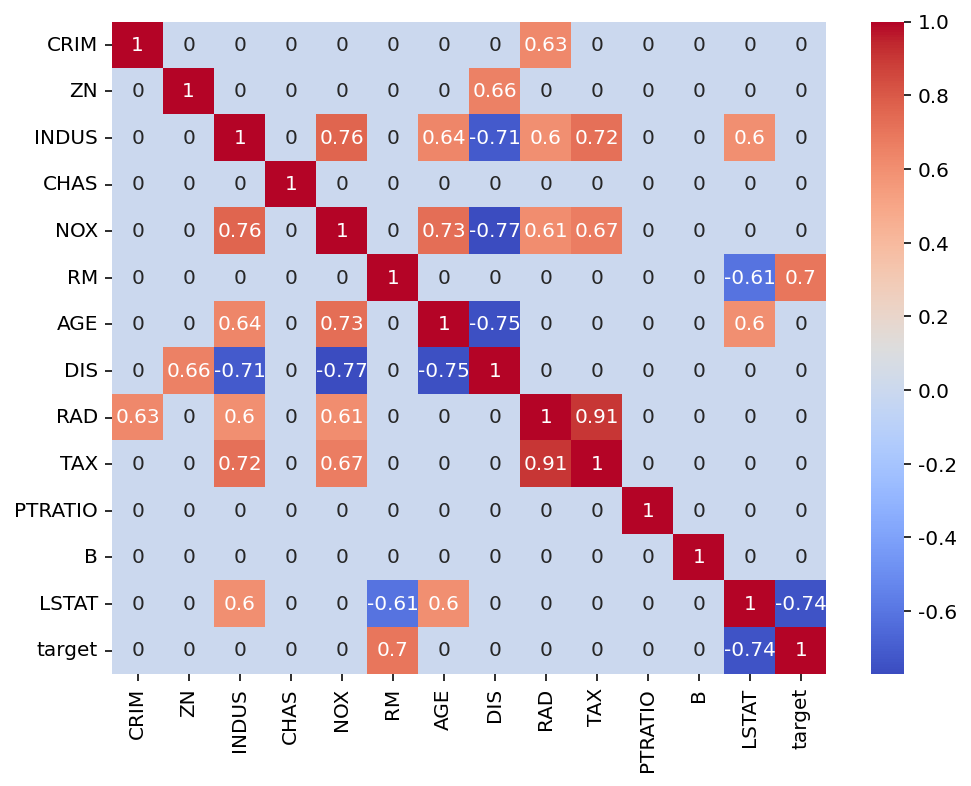

In [10]:
plt.figure(figsize=(8, 6))
corr[np.abs(corr) < 0.6] = 0
sns.heatmap(corr, annot=True, cmap='coolwarm');

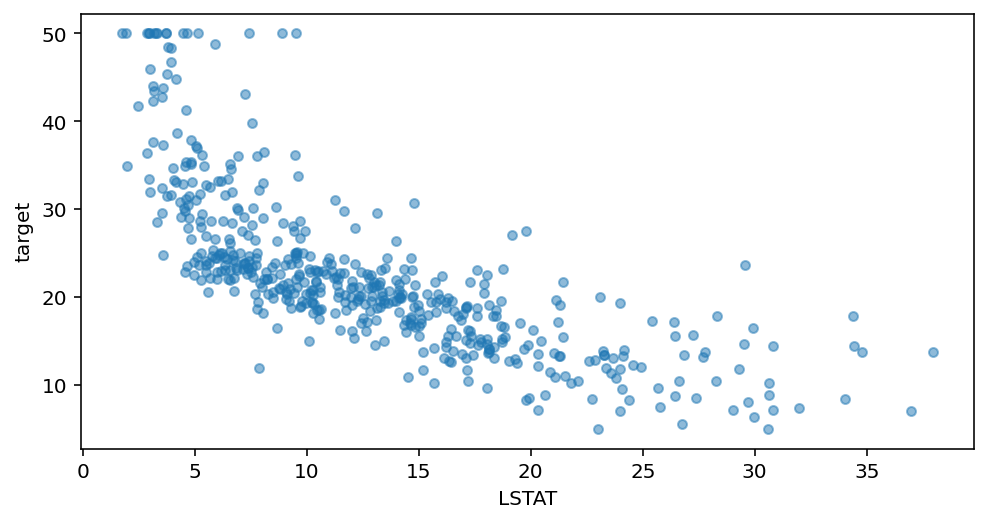

In [37]:
df.plot(kind='scatter', x='LSTAT', y='target', alpha=0.5, figsize=(8,4));

In [12]:
X = df[['LSTAT']]
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)


In [14]:
print('訓練集的筆數：',len(X_train))
print('測試集的筆數：',len(X_test))
print('測試集所佔全部資料的百分比：',len(X_test)/len(X))

訓練集的筆數： 339
測試集的筆數： 167
測試集所佔全部資料的百分比： 0.3300395256916996


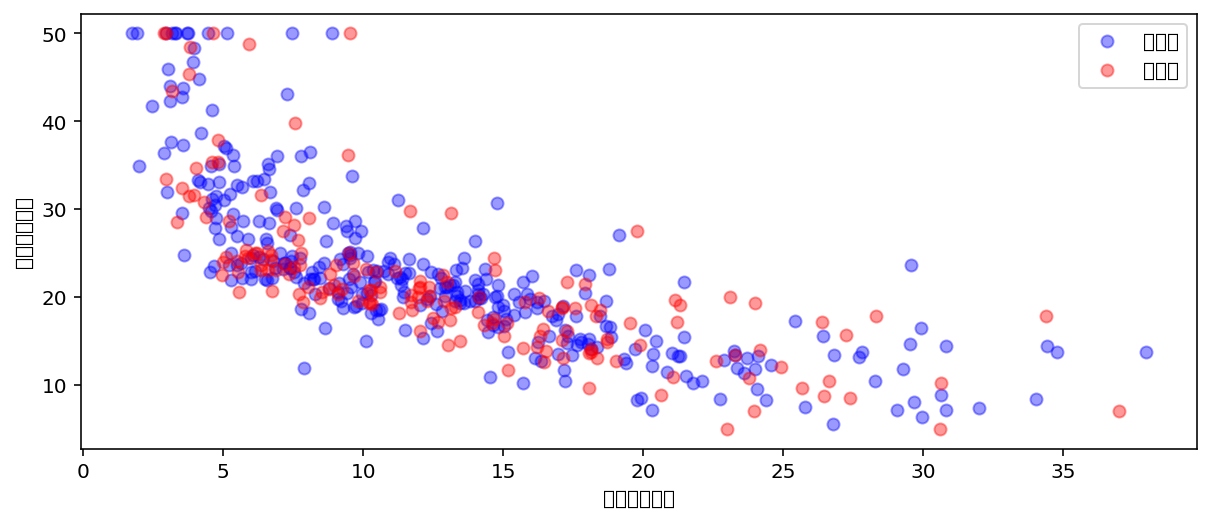

In [15]:
plt.figure(figsize=(10,4))
plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='訓練集')
plt.scatter(X_test, y_test, color='red', alpha=0.4, label='測試集')
plt.xlabel('低收入戶數量')
plt.ylabel('低收入戶人數')
plt.legend();

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print(model.intercept_, model.coef_)

35.2251661672225 [-0.98053701]


In [19]:
y_pred = model.predict(X_test)

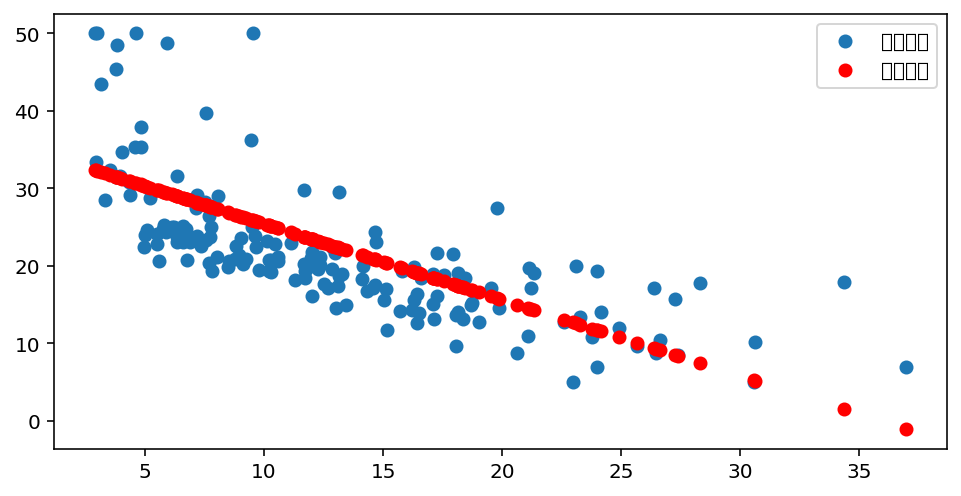

In [20]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test, label='實際資料')
plt.scatter(X_test, y_pred, c='r', label='預測結果')
plt.legend()

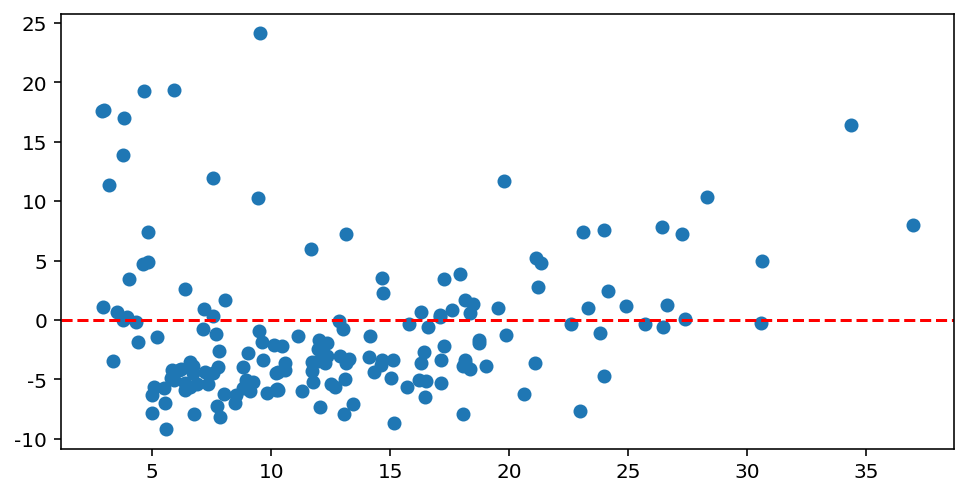

In [21]:
plt.figure(figsize=(8,4))
plt.scatter(X_test, y_test-y_pred)
plt.axhline(0, c='r', ls='--');

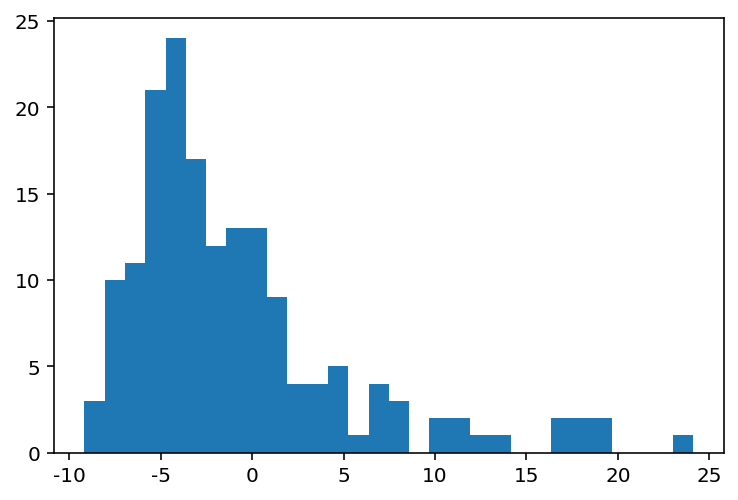

In [22]:
plt.hist(y_test-y_pred, bins=30);

In [23]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test['y_pred'] = y_pred
df_test['error'] = df_test['target']-df_test['y_pred']
df_test['error_abs'] = np.abs(df_test['error'])
df_test.sort_values(by='error_abs', ascending=False, inplace=True)
df_test.head()

,LSTAT,target,y_pred,error,error_abs
371,9.53,50.0,25.880648,24.119352,24.119352
262,5.91,48.8,29.430192,19.369808,19.369808
225,4.63,50.0,30.685280,19.314720,19.314720
195,2.97,50.0,32.312971,17.687029,17.687029
204,2.88,50.0,32.401220,17.598780,17.598780


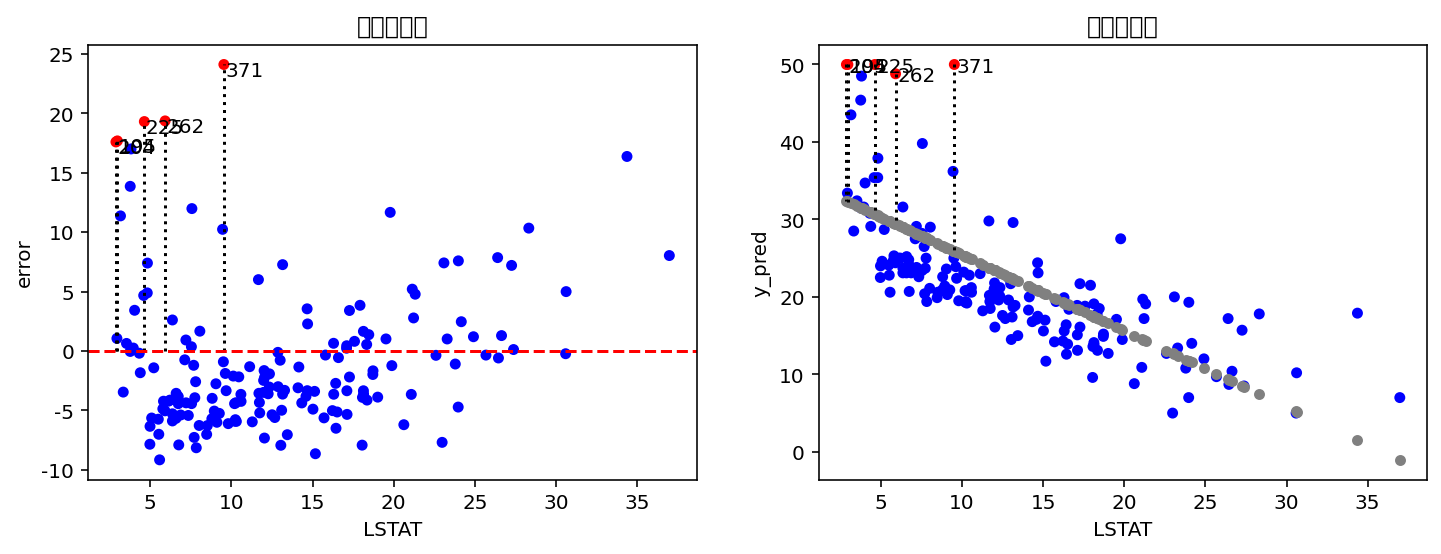

In [25]:
colors = ['red']*5 + ['blue']*(len(df_test)-5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
# 第一張圖
ax = axes[0]
df_test.plot(kind='scatter', x='LSTAT', y='error', c=colors, ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'LSTAT']+0.1, y=df_test.loc[i,'error']-1, s=i)
    ax.vlines(x=df_test.loc[i,'LSTAT'], ymin=0, ymax=df_test.loc[i,'error'], ls=':')
ax.axhline(0, c='r', ls='--')
ax.set_title('殘差值分佈')

# 第二張圖
ax = axes[1]
df_test.plot(kind='scatter', x='LSTAT', y='target', c=colors, ax=ax)
df_test.plot(kind='scatter', x='LSTAT', y='y_pred', c='gray', ax=ax)
for i in df_test.index[:5]:
    ax.text(x=df_test.loc[i,'LSTAT']+0.1, y=df_test.loc[i,'target']-1, s=i)
    ax.vlines(x=df_test.loc[i,'LSTAT'], 
              ymin=df_test.loc[i,'target'], ymax=df_test.loc[i,'y_pred'], ls=':')
ax.set_title('實際值分佈');

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


In [27]:
model.predict([[6]])

array([29.34194413])

In [28]:
model.intercept_+ model.coef_*6

array([29.34194413])

In [29]:
X_train['LSTAT2'] = X_train['LSTAT']**2
X_test['LSTAT2'] = X_test['LSTAT']**2
X_train.head()

,LSTAT,LSTAT2
478,18.03,325.0809
26,14.81,219.3361
7,19.15,366.7225
492,13.35,178.2225
108,12.27,150.5529


In [35]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 38.410075117662345
Mean Absolute Error: 4.744269760624963
R2 Score: 0.49245729145962347


In [31]:
model_2.intercept_, model_2.coef_

(43.9275189453703, array([-2.43714943,  0.04576868]))

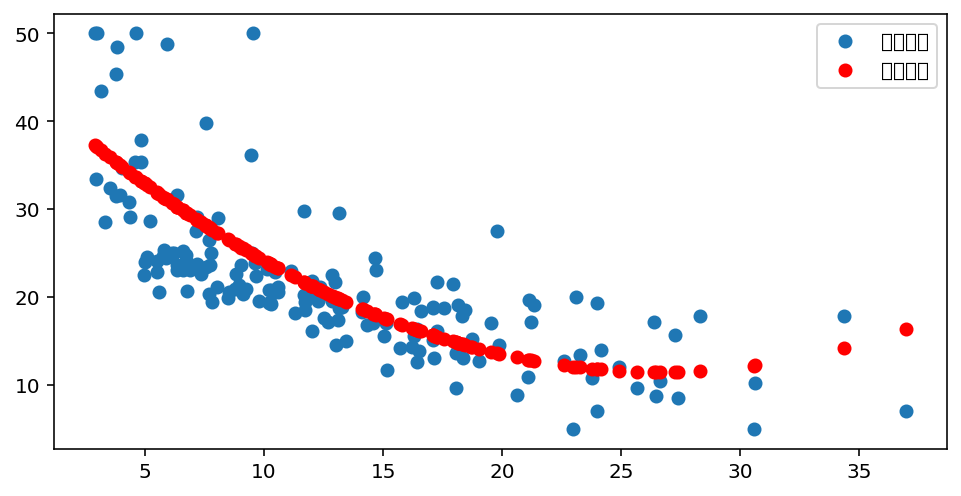

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(X_test.iloc[:,0], y_test, label='實際資料')
plt.scatter(X_test.iloc[:,0], y_pred, c='r', label='預測結果')
plt.legend();

In [33]:
# 先將原本的二次方欄位刪除
X_train.drop('LSTAT2', axis=1, inplace=True)
X_test.drop('LSTAT2', axis=1, inplace=True)

# 觀察前五筆資料與手動增加的二次方項是相同的，多出來的1不用去理它
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
x_poly = polynomial.fit_transform(X_train)
x_poly[:5]

array([[  1.    ,  18.03  , 325.0809],
       [  1.    ,  14.81  , 219.3361],
       [  1.    ,  19.15  , 366.7225],
       [  1.    ,  13.35  , 178.2225],
       [  1.    ,  12.27  , 150.5529]])

In [38]:
from sklearn.pipeline import make_pipeline
model_pl_2 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model_pl_2.fit(X_train, y_train)
y_pred = model_pl_2.predict(X_test)
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 30.66871726088642
Mean Absolute Error: 4.119200933191487
R2 Score: 0.5947499769691513


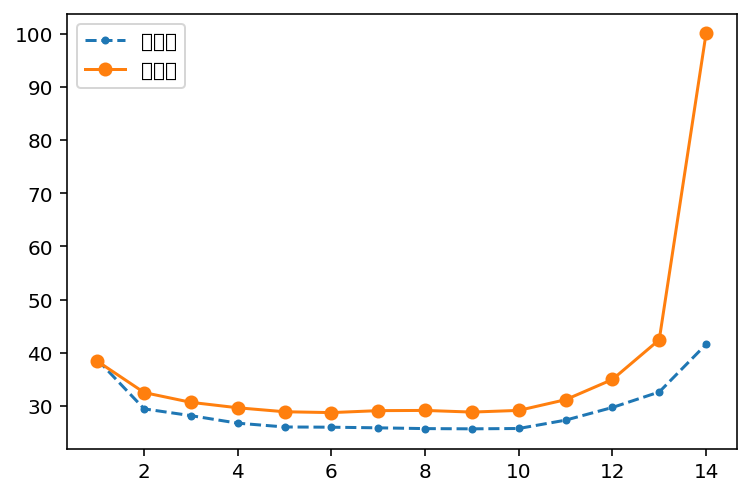

In [42]:
errors_train = []
errors_test = []
for order in range(1, 15):
    model_pl_o = make_pipeline(PolynomialFeatures(degree=order), LinearRegression())
    model_pl_o.fit(X_train, y_train)
    y_pred = model_pl_o.predict(X_train)
    errors_train.append(mean_squared_error(y_train, y_pred))
    y_pred = model_pl_o.predict(X_test)
    errors_test.append(mean_squared_error(y_test, y_pred))
    
plt.plot(range(1,15),errors_train, marker='.', ls = '--', label='訓練集')
plt.plot(range(1,15),errors_test, marker='o', label='測試集')
plt.legend();